In [1]:
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 6)

In [21]:
import datetime
start = datetime.datetime(2010, 7, 17)
end = datetime.datetime(2017, 10, 8)
web.DataReader('TSLA', 'yahoo', start, end)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500
2010-07-20,21.850000,21.850000,20.049999,20.299999,20.299999,1825300
2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500
...,...,...,...,...,...,...
2017-10-05,356.000000,357.440002,351.350006,355.329987,355.329987,4171700
2017-10-06,353.100006,360.100006,352.250000,356.880005,356.880005,4297500
2017-10-09,349.649994,351.750000,342.670013,342.940002,342.940002,7493700


In [23]:
# pandas-datareader package has a DataReader class for Yahoo finance, Google finance, etc

import pandas_datareader.data as web
# from datetime import datetime

df = pd.DataFrame()
symbols = 'GOOG IBM GE TSLA AAPL'.split()
for symbol in symbols:
    df_onesym = web.DataReader(symbol, 'yahoo', start, end)
    for name in df_onesym:
        newname = symbol.lower() + '_' + name.replace(' ', '_').lower()
        df[newname] = df_onesym[name]
df.to_csv('../shared-resources/time_series/time-series.csv')
df = df.fillna(method='ffill')
df = df.reindex()

In [16]:
df.columns

Index(['goog_open', 'goog_high', 'goog_low', 'goog_close', 'goog_adj_close',
       'goog_volume', 'ibm_open', 'ibm_high', 'ibm_low', 'ibm_close',
       'ibm_adj_close', 'ibm_volume', 'ge_open', 'ge_high', 'ge_low',
       'ge_close', 'ge_adj_close', 'ge_volume', 'tsla_open', 'tsla_high',
       'tsla_low', 'tsla_close', 'tsla_adj_close', 'tsla_volume', 'aapl_open',
       'aapl_high', 'aapl_low', 'aapl_close', 'aapl_adj_close', 'aapl_volume'],
      dtype='object')

In [25]:
df.head()

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,...,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,229.015472,233.307556,227.281754,231.583771,231.583771,9159800,128.669998,130.380005,128.369995,129.789993,...,20.920000,21.910000,21.910000,2486500,35.697144,35.697144,34.228573,35.082859,31.562510,256119500
2010-07-20,229.025406,239.934464,228.811798,239.238983,239.238983,8161600,122.970001,126.559998,122.930000,126.550003,...,20.049999,20.299999,20.299999,1825300,34.700001,36.128571,34.287144,35.984287,32.373478,268737700
2010-07-21,240.436188,241.280701,236.178879,237.207199,237.207199,6601800,126.440002,126.500000,124.620003,125.269997,...,19.500000,20.219999,20.219999,1252500,37.869999,37.878571,36.285713,36.320000,32.675503,296417800
2010-07-22,240.053680,242.910110,239.681107,240.838577,240.838577,4323200,126.320000,127.779999,126.050003,127.470001,...,20.370001,21.000000,21.000000,957800,36.811428,37.142857,36.472858,37.002857,33.289845,161329700
2010-07-23,238.831635,243.709900,238.454086,243.446609,243.446609,4558200,127.300003,128.800003,127.000000,128.380005,...,21.059999,21.290001,21.290001,653600,36.727142,37.197144,36.611427,37.134285,33.408085,133347200


In [36]:
df.index.name = df.index.name.lower().replace(' ', '_')

In [37]:
df = df.fillna(method='ffill')
df = df.reindex()
df.to_csv('../shared-resources/time_series/time-series.csv')

In [40]:
df = pd.read_csv('../shared-resources/time_series/time-series.csv', index_col=0, header=0, parse_dates=True)
type(df.index)
df.index.isnull().sum()

0

In [72]:
bit_df = pd.read_csv('../shared-resources/time_series/coindesk-bpi-USD-ohlc_data-2010-06-30_2017-10-08.csv', index_col=0, header=0, parse_dates=True)

In [83]:
bit_df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [84]:
bit_df = bit_df.fillna(method='ffill')
# bit_df.index.name = bit_df.index.name.lower().replace(' ', '_')
# bit_df.index = pd.to_datetime(bit_df.index)

In [85]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [110]:
from IPython.display import display, HTML
import seaborn as sns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))

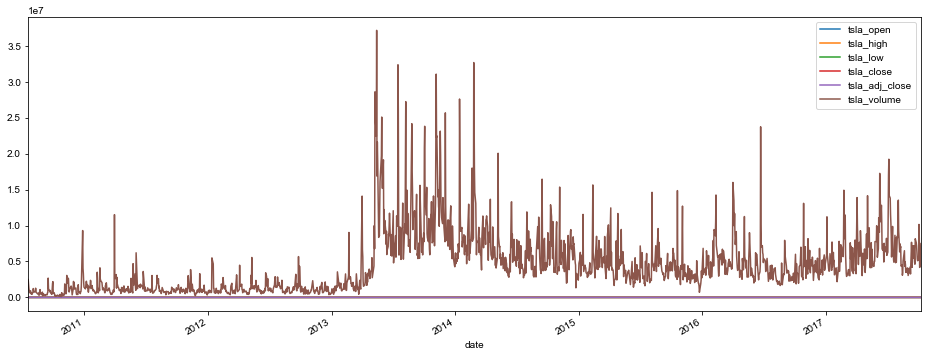

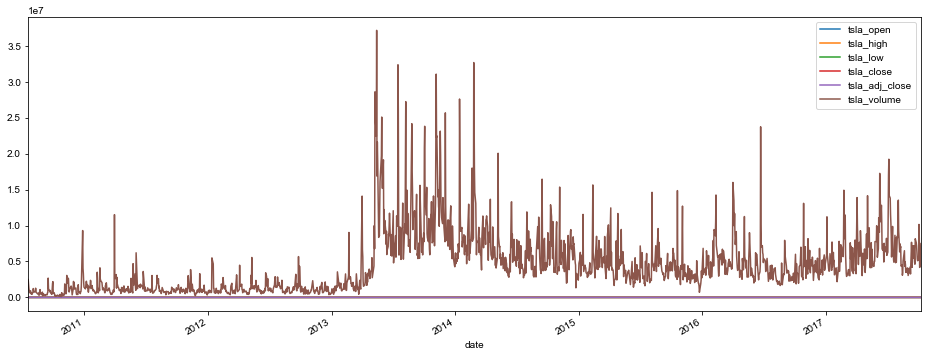

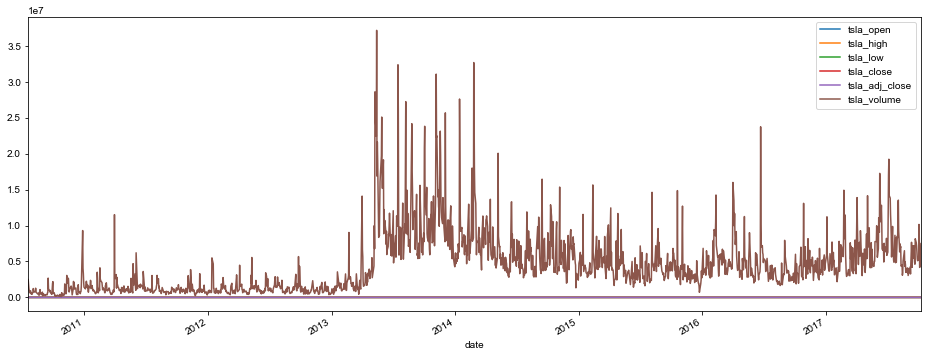

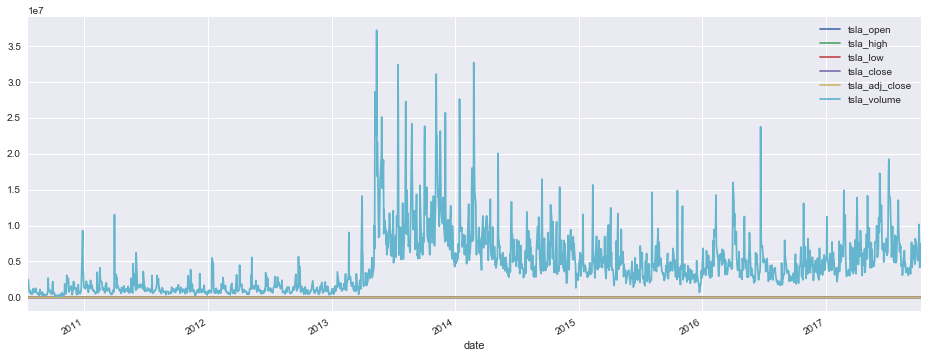

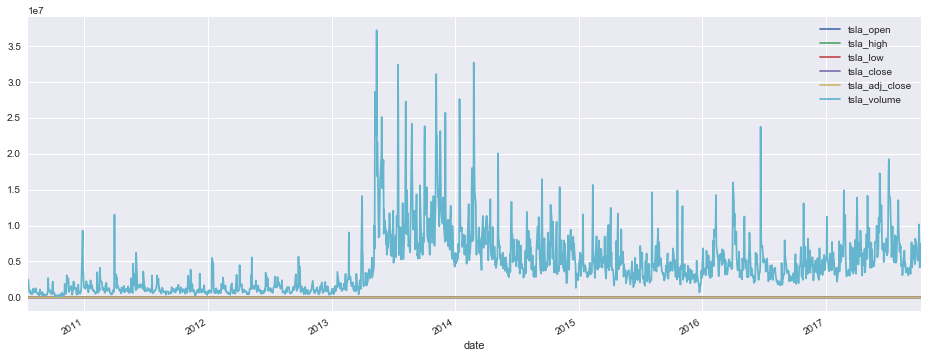

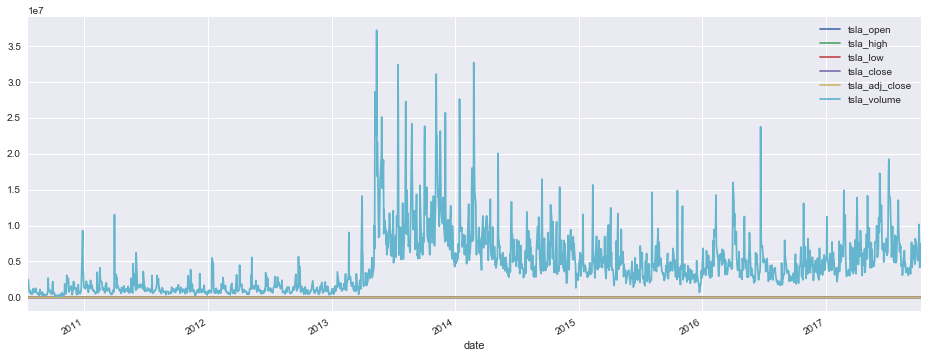

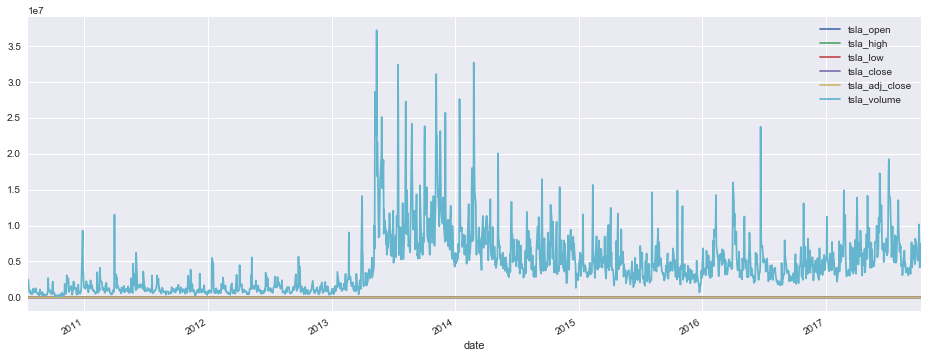

In [124]:
df[[c for c in df.columns if c.startswith('tsla')]].plot(figsize=(16, 6))
plt.show()

In [207]:
c = [c for c in df.columns if c.startswith('tsla')]
tsla = df[c]

In [208]:
tsla.head()

,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume
date,,,,,,
2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500
2010-07-20,21.850000,21.850000,20.049999,20.299999,20.299999,1825300
2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500
2010-07-22,20.500000,21.250000,20.370001,21.000000,21.000000,957800
2010-07-23,21.190001,21.559999,21.059999,21.290001,21.290001,653600


In [107]:
c = ['tsla_open', 'tsla_high', 'tsla_low', 'tsla_close']
tsla_adj = pd.DataFrame()

for a in c:
    tsla_adj[a] = tsla[a]/tsla.tsla_close

In [206]:
tsla_adj.head()

,tsla_open,tsla_high,tsla_low,tsla_close
date,,,,
2010-07-19,0.975354,1.015518,0.954815,1.0
2010-07-20,1.076355,1.076355,0.987685,1.0
2010-07-21,1.021761,1.033630,0.964392,1.0
2010-07-22,0.976190,1.011905,0.970000,1.0
2010-07-23,0.995303,1.012682,0.989197,1.0


In [209]:
y = tsla.tsla_close.iloc[1:]
X = tsla.iloc[:-1]
X

,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume
date,,,,,,
2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500
2010-07-20,21.850000,21.850000,20.049999,20.299999,20.299999,1825300
2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500
...,...,...,...,...,...,...
2017-10-04,351.250000,358.619995,349.600006,355.010010,355.010010,8163500
2017-10-05,356.000000,357.440002,351.350006,355.329987,355.329987,4171700
2017-10-06,353.100006,360.100006,352.250000,356.880005,356.880005,4297500


In [210]:
tsla.iloc[-1]

tsla_open         3.496500e+02
tsla_high         3.517500e+02
tsla_low          3.426700e+02
tsla_close        3.429400e+02
tsla_adj_close    3.429400e+02
tsla_volume       7.493700e+06
Name: 2017-10-09 00:00:00, dtype: float64

In [211]:
X.iloc[-1]

tsla_open         3.531000e+02
tsla_high         3.601000e+02
tsla_low          3.522500e+02
tsla_close        3.568800e+02
tsla_adj_close    3.568800e+02
tsla_volume       4.297500e+06
Name: 2017-10-06 00:00:00, dtype: float64

In [212]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9979821344811538

In [213]:
tsla

,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume
date,,,,,,
2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500
2010-07-20,21.850000,21.850000,20.049999,20.299999,20.299999,1825300
2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500
...,...,...,...,...,...,...
2017-10-05,356.000000,357.440002,351.350006,355.329987,355.329987,4171700
2017-10-06,353.100006,360.100006,352.250000,356.880005,356.880005,4297500
2017-10-09,349.649994,351.750000,342.670013,342.940002,342.940002,7493700


In [214]:
tsla.tsla_close.diff()

date
2010-07-19          NaN
2010-07-20    -1.610001
2010-07-21    -0.080000
                ...    
2017-10-05     0.319977
2017-10-06     1.550018
2017-10-09   -13.940003
Name: tsla_close, Length: 1821, dtype: float64

In [220]:
tsla['diff_close'] = tsla.tsla_close.diff()

/Users/leey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
X['diff_close'] = tsla.diff_close

/Users/leey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [219]:
X

,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume,diff_close
date,,,,,,,
2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500,NaN
2010-07-20,21.850000,21.850000,20.049999,20.299999,20.299999,1825300,-1.610001
2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500,-0.080000
...,...,...,...,...,...,...,...
2017-10-04,351.250000,358.619995,349.600006,355.010010,355.010010,8163500,6.869995
2017-10-05,356.000000,357.440002,351.350006,355.329987,355.329987,4171700,0.319977
2017-10-06,353.100006,360.100006,352.250000,356.880005,356.880005,4297500,1.550018
